In [1]:
#데이터 탐색을 위해 라이브러리 부른다.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
t = pd.read_csv("C:/Users/Affinity/Downloads/titanic.csv",
                encoding="utf-8")

In [32]:
t.head(5) # 자료 보기

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
t["Survived"]=t["Survived"].astype(object)
t["Pclass"]=t["Pclass"].astype(object)

In [34]:
t.info() # 속성의 타입 파악

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null object
Pclass         891 non-null object
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 83.6+ KB


In [35]:
t.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

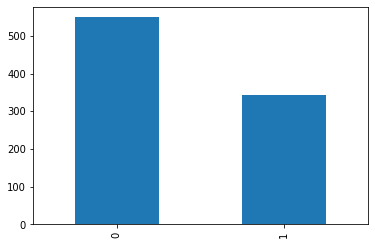

In [36]:
t["Survived"].value_counts().plot(kind='bar')
plt.show()

In [37]:
#남녀 비율에 비해 여자의 생존율이 높은 경우, 남자의 다른 공통 특성, 여자의 공통특성이 있나 의문을 가지게 됨
sex_df = t.groupby(['Sex','Survived'])["Survived"].count() \ 
.unstack('Survived')
sex_df.plot(kind='bar',figsize = (20,10))

SyntaxError: unexpected character after line continuation character (<ipython-input-37-c16190bd7489>, line 2)

In [38]:
category_feature = [col for col in t.columns if 
                   t[col].dtypes == "object"]
category_feature

['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [39]:
category_feature = list(set(category_feature)-set(['Survived']))
category_feature

['Sex', 'Embarked', 'Pclass', 'Ticket', 'Cabin', 'Name']

In [40]:
numerical_feature = list(set(t.columns)-set(category_feature)
                         -set(['PassengerId','Survived']))
numerical_feature = np.sort(numerical_feature)
numerical_feature

array(['Age', 'Fare', 'Parch', 'SibSp'], dtype='<U5')

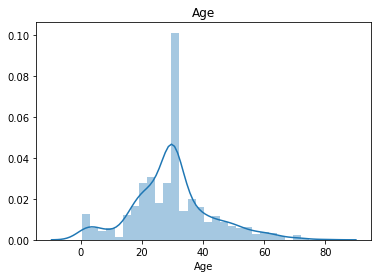

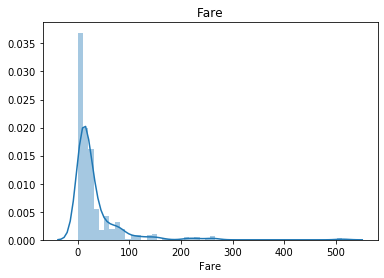

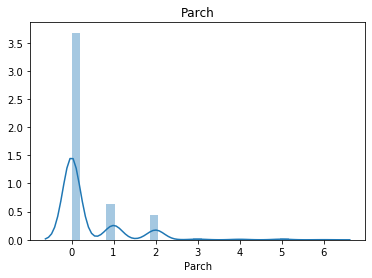

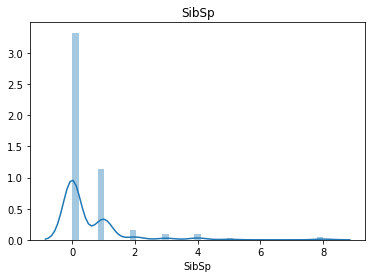

In [44]:
for  col in numerical_feature:
    sns.distplot(t.loc[t[col].notnull(),col])
    plt.title(col)
    plt.show()

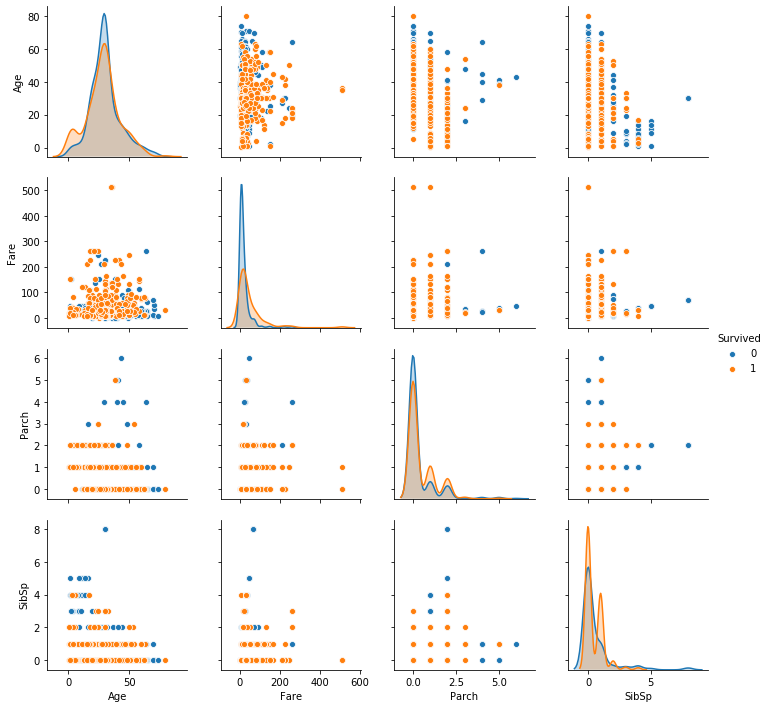

In [46]:
# 변수 간의 분포를 파악
sns.pairplot(t[list(numerical_feature)+ ['Survived'] ], hue='Survived',
            x_vars = numerical_feature, y_vars=numerical_feature)
plt.show()

## safe driver 문제

In [7]:
trn = pd.read_csv("C:/Users/Affinity/Downloads/ssd_train.csv",
                  na_values=['-1','-1.0'])
tst = pd.read_csv("C:/Users/Affinity/Downloads/ssd_test.csv",
                  na_values=['-1','-1.0'])

In [8]:
trn.head(5)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1.0,7,0.0,0.0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [9]:
print(trn.shape, tst.shape) # (행,열) 열의 개수가 서로 다르다!!
# 그러므로 받은 데이터를 바로 훈련과 테스트로 쓰면 안된다.

(595212, 59) (892816, 58)


In [10]:
trn.info() # 현재 타입은 수치이지만, 오브젝트(명목)으로 바꿔야 할 수도 있다. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     594996 non-null float64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595129 non-null float64
ps_ind_05_cat     589403 non-null float64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64

In [11]:
np.unique(trn['target'])

array([0, 1], dtype=int64)

In [12]:
tst['target']=np.nan
df=pd.concat([trn,tst],axis=0)

C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [13]:
import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns
%matplotlib inline
def bar_plot(col, data, hue=True):
    f, ax, = plt.subplots(figsize=(10,5))
    sns.countplot(x=col,hue=hue,data=data,alpha=0.5)
    plt.show()
    
def dist_plot(col,data):
    f, ax = plt.subplots(figsize = (10,5))
    sns.distplot(data[col],dropna(),kde=False, bins=10)
    plt.show()
def bar_plot_ci(col,data):
    f, ax = plt.subplots(figsize = (10,5))
    sns.barplot(x=col, y='target', data=data)
    plt.show()


In [14]:
df.columns

Index(['id', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11', 'ps_car_11_cat', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'target'],


In [15]:
df.head(5)

,id,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,...,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,target
0,7,0.6,0.5,0.2,3,1,10,1,10,1,...,0,0,11,0,1,0,0.7,0.2,0.718070,0.0
1,9,0.3,0.1,0.3,2,1,9,5,8,1,...,0,0,3,0,0,1,0.8,0.4,0.766078,0.0
2,13,0.5,0.7,0.1,2,2,9,1,8,2,...,0,0,12,1,0,0,0.0,0.0,NaN,0.0
3,16,0.6,0.9,0.1,2,4,7,1,8,4,...,0,0,8,1,0,0,0.9,0.2,0.580948,0.0
4,17,0.4,0.6,0.0,2,2,6,3,10,2,...,0,0,9,1,0,0,0.7,0.6,0.840759,0.0


In [16]:
binary = ['ps_ind_06_bin','ps_ind_07_bin','ps_ind_08_bin','ps_ind_09_bin'
          ,'ps_ind_10_bin','ps_ind_11_bin','ps_ind_12_bin','ps_ind_13_bin'
          ,'ps_ind_16_bin','ps_ind_17_bin','ps_ind_18_bin','ps_calc_15_bin'
          ,'ps_calc_16_bin','ps_calc_17_bin','ps_calc_18_bin','ps_calc_19_bin'
          ,'ps_calc_20_bin']

category=['ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
          'ps_ind_05_cat','ps_car_01_cat', 'ps_car_02_cat',
          'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
          'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
          'ps_car_11', 'ps_car_11_cat']

integer = ['ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
          'ps_ind_05_cat','ps_car_01_cat', 'ps_car_02_cat',
          'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
          'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
          'ps_car_11', 'ps_car_11_cat']

floats = ['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_calc_01', 'ps_calc_02',
          'ps_calc_03','ps_car_12', 'ps_car_13', 'ps_car_14','ps_car_15']

TypeError: 'bool' object is not iterable

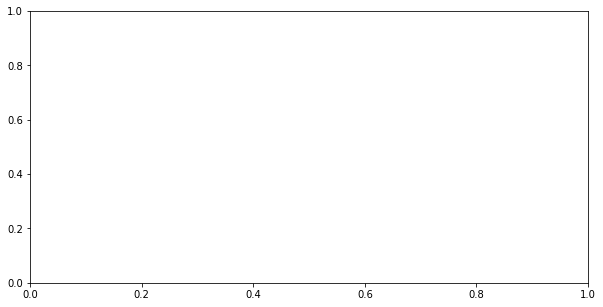

In [33]:
for col in binary:
    bar_plot(col,df)

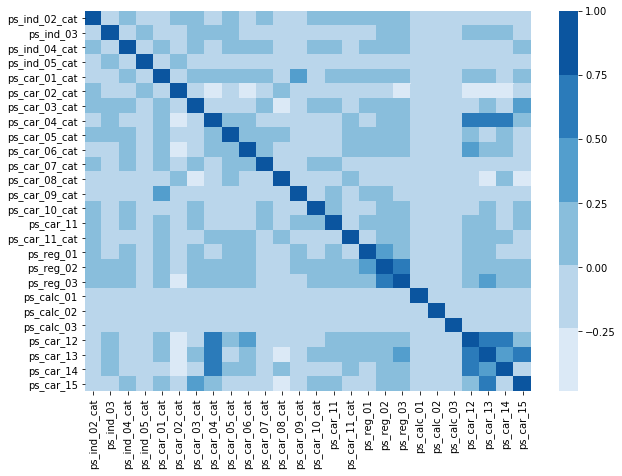

In [17]:
corr = df.corr()
cmap= sns.color_palette("Blues")

features = [ 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
          'ps_ind_05_cat','ps_car_01_cat', 'ps_car_02_cat',
          'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
          'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
          'ps_car_11', 'ps_car_11_cat', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_calc_01', 'ps_calc_02',
          'ps_calc_03','ps_car_12', 'ps_car_13', 'ps_car_14','ps_car_15']
corr_sub = df[features].corr()
f, ax = plt.subplots(figsize=(10,7))
sns.heatmap(corr_sub, cmap=cmap)

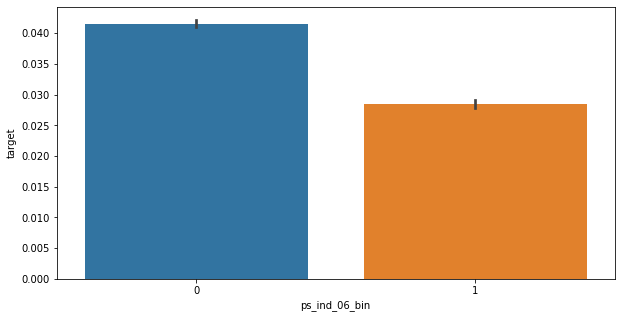

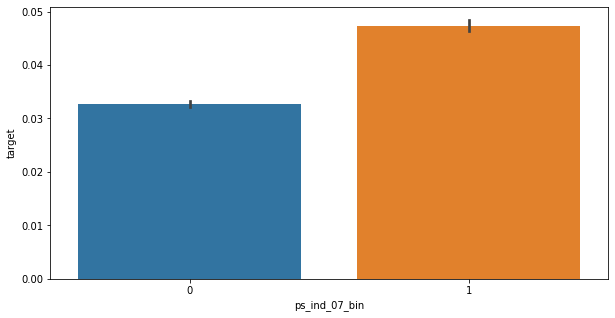

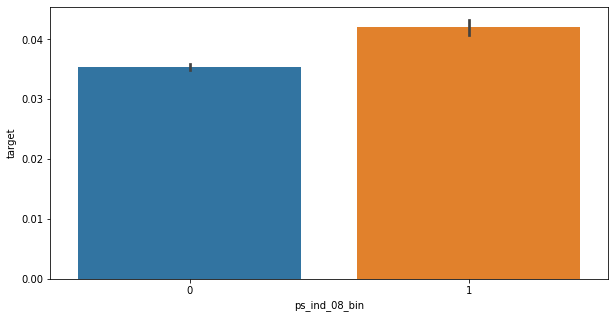

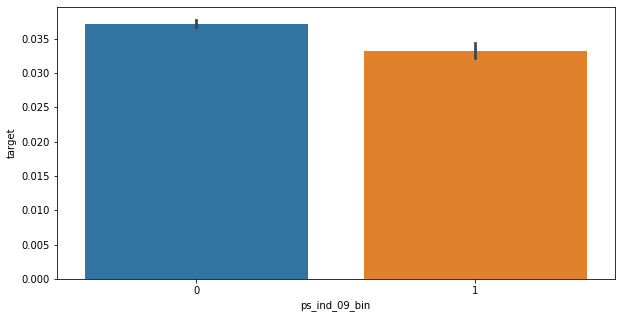

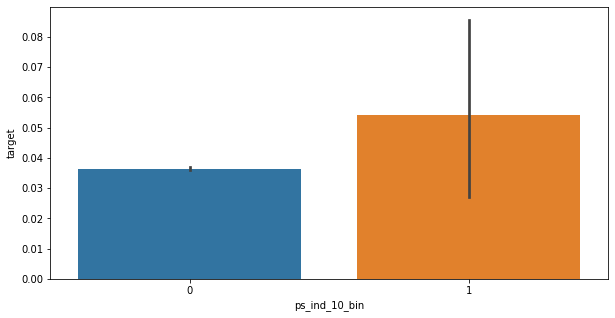

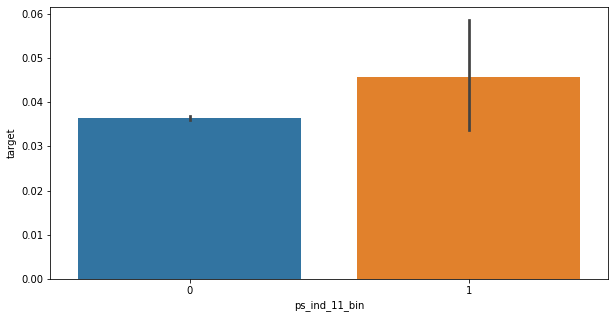

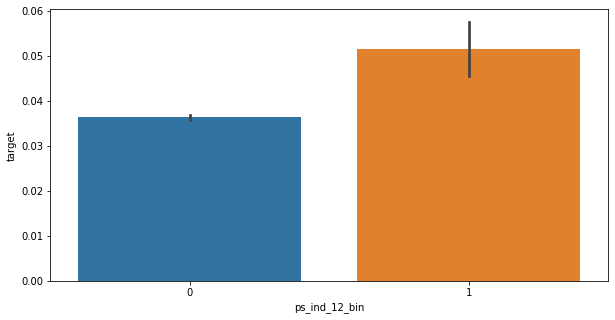

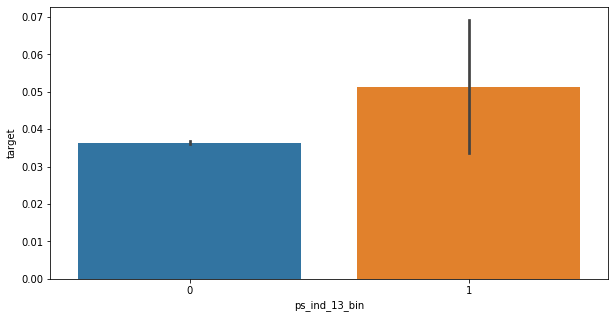

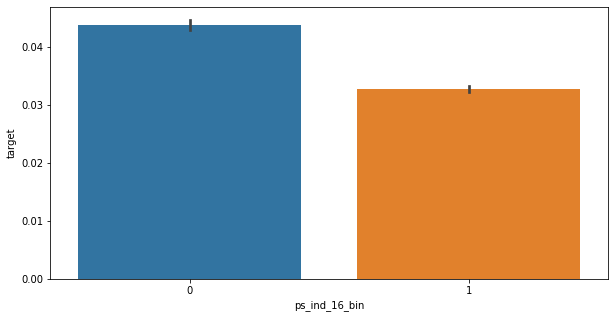

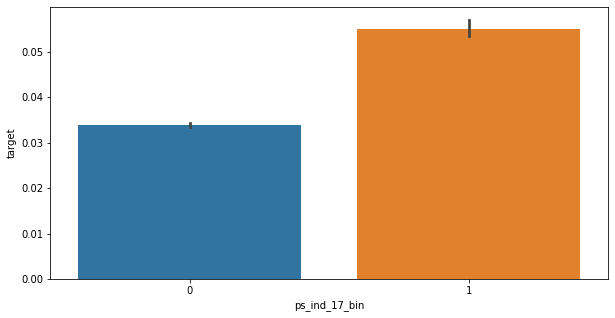

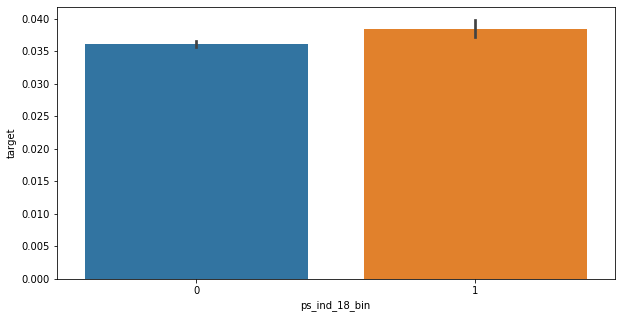

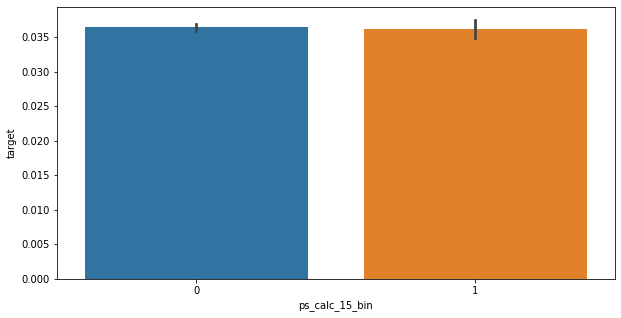

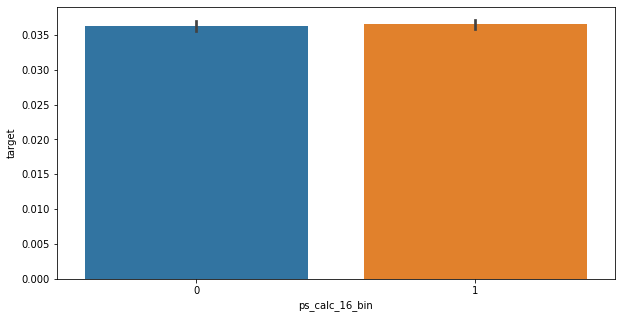

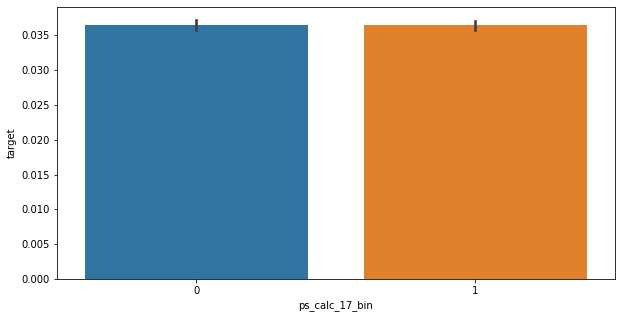

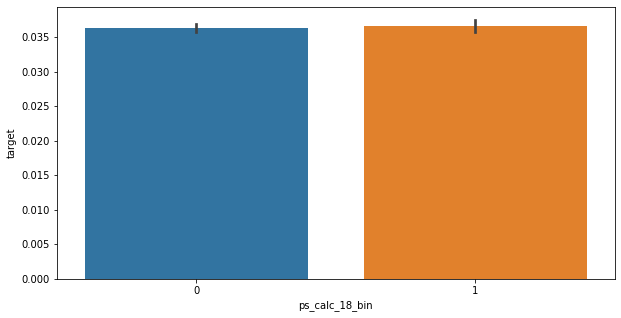

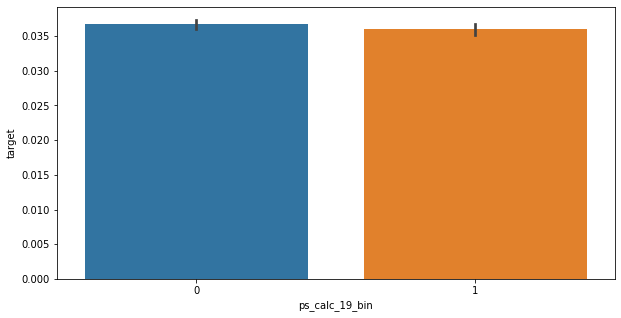

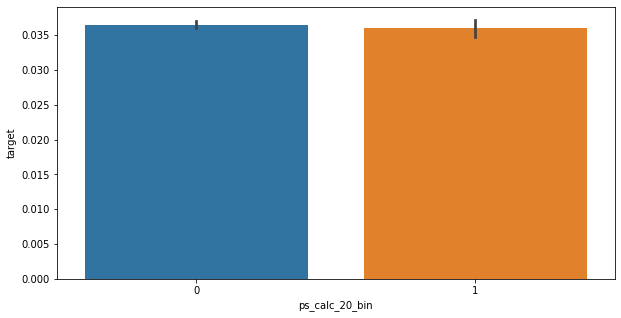

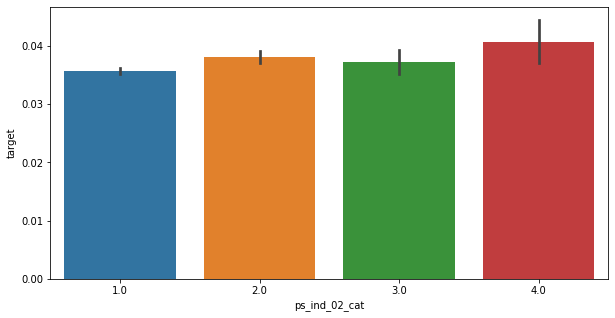

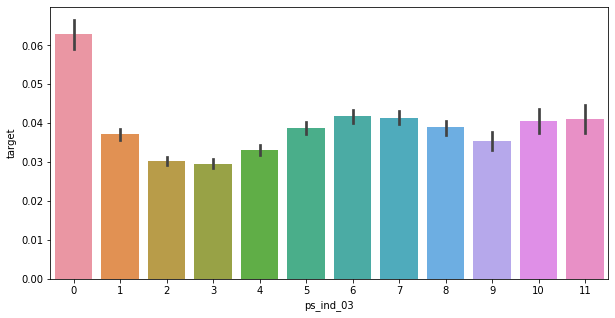

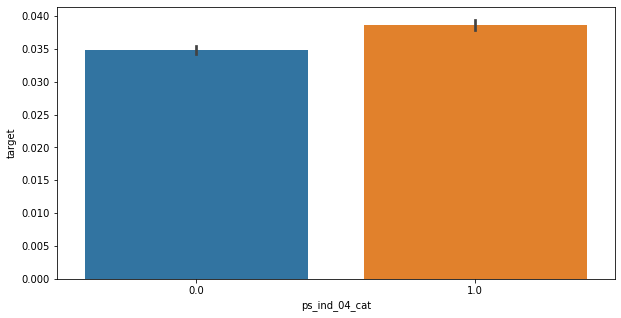

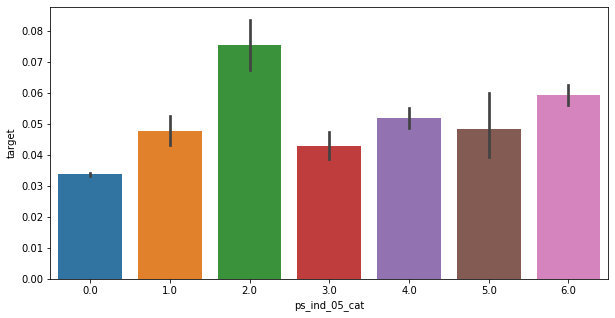

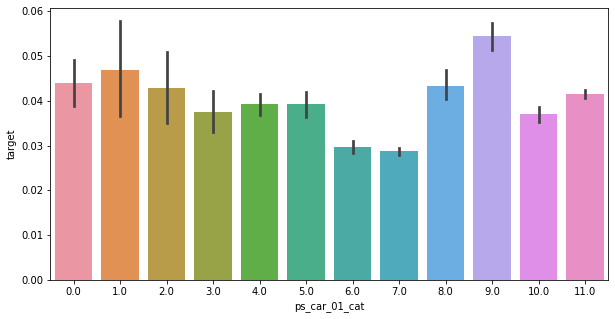

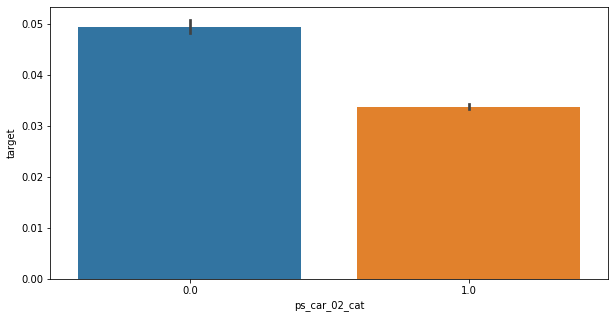

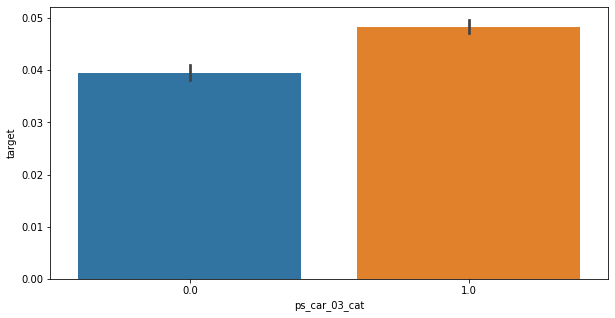

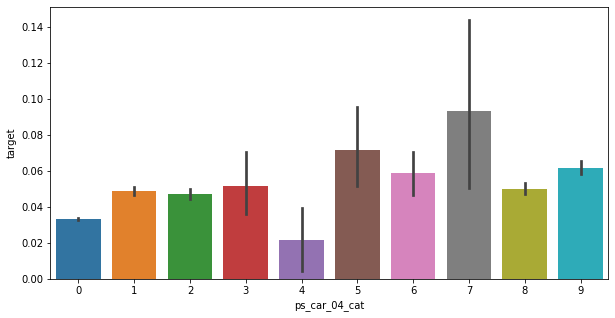

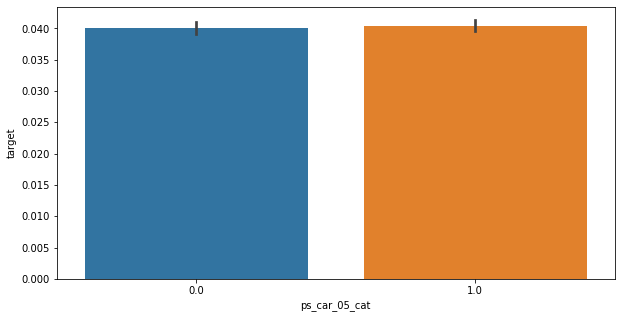

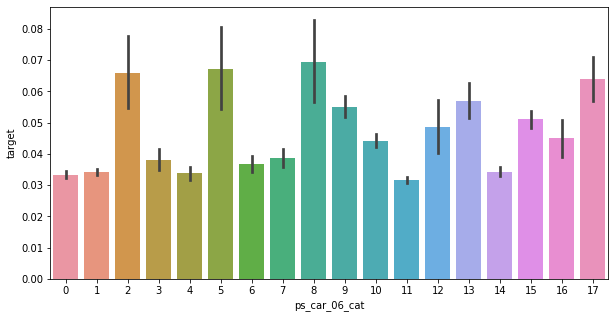

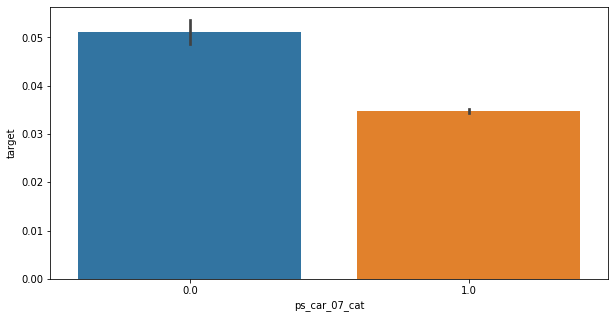

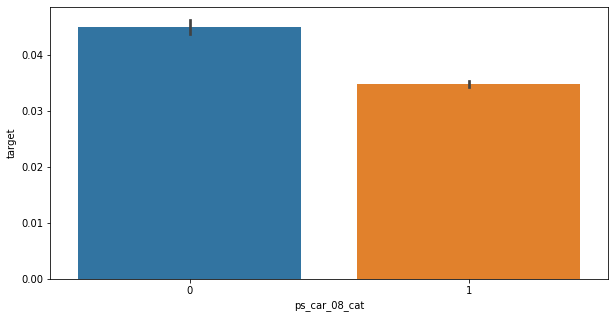

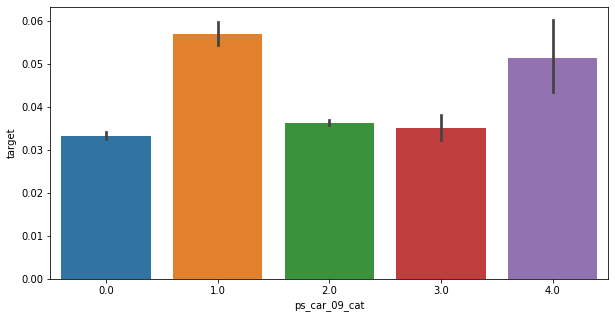

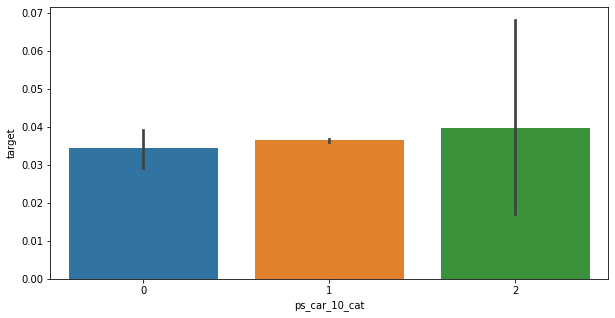

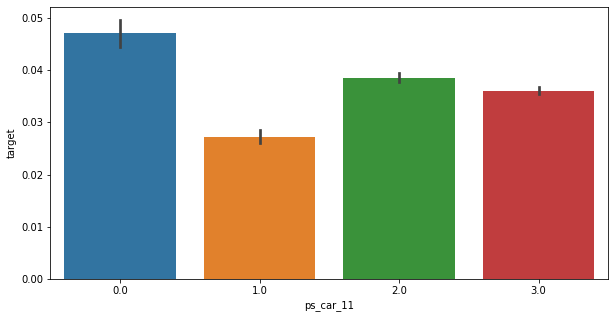

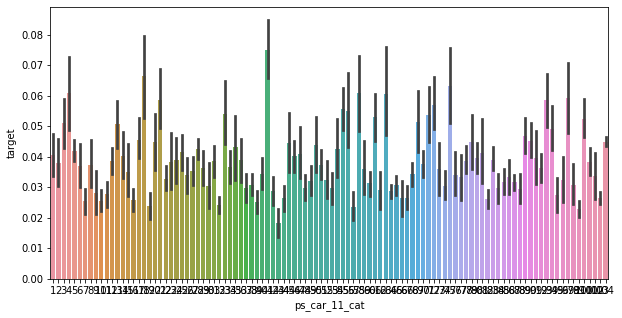

In [32]:
for col in binary+category:
    bar_plot_ci(col,df)